<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Создание признаков</a></span><ul class="toc-item"><li><span><a href="#Календарные-признаки" data-toc-modified-id="Календарные-признаки-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Календарные признаки</a></span></li><li><span><a href="#Графический-анализ-данных" data-toc-modified-id="Графический-анализ-данных-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Графический анализ данных</a></span></li><li><span><a href="#Смещение-данных-/-лаг" data-toc-modified-id="Смещение-данных-/-лаг-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Смещение данных / лаг</a></span></li><li><span><a href="#Скользящее-среднее---MA" data-toc-modified-id="Скользящее-среднее---MA-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Скользящее среднее - MA</a></span></li><li><span><a href="#Создание-дополнительных-признаков-смещения-и-MA" data-toc-modified-id="Создание-дополнительных-признаков-смещения-и-MA-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Создание дополнительных признаков смещения и MA</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-базовая-Dummy-mean" data-toc-modified-id="Модель-базовая-Dummy-mean-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель базовая Dummy-mean</a></span></li><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#Модель-ElasticNet" data-toc-modified-id="Модель-ElasticNet-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель ElasticNet</a></span></li><li><span><a href="#Модель-LightGBM" data-toc-modified-id="Модель-LightGBM-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель LightGBM</a></span></li><li><span><a href="#Модель-Хольта-Винтерса" data-toc-modified-id="Модель-Хольта-Винтерса-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель Хольта-Винтерса</a></span><ul class="toc-item"><li><span><a href="#Прогноз-на-24-часа" data-toc-modified-id="Прогноз-на-24-часа-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Прогноз на 24 часа</a></span></li><li><span><a href="#Прогноз-на-1-час.-Адаптация-под-проектный-датасет" data-toc-modified-id="Прогноз-на-1-час.-Адаптация-под-проектный-датасет-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Прогноз на 1 час. Адаптация под проектный датасет</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#ВЫВОДЫ" data-toc-modified-id="ВЫВОДЫ-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ВЫВОДЫ</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

In [1]:
import pandas as pd
import numpy as np
# библиотеки ML
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet 
from sklearn.pipeline import Pipeline
from scipy.optimize import minimize
import lightgbm as lgb
# библиотеки графики
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# настройки окружения
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid", {'axes.grid' : True}) # задает темный фон и сетку на графиках
pd.options.display.max_columns = None
#pd.options.display.max_colwidth = 100
pd.set_option("precision", 2)

In [3]:
# создаем функцию и скорер RMSE  
def rmse(y1, y2):
     return  mean_squared_error(y1, y2) ** 0.5

rmse_score = make_scorer(rmse, greater_is_better=False)

## Подготовка

In [4]:
# загрузка данных
df = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])
df.sort_index(inplace=True)

In [5]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [6]:
# проверка пропусков
df.isna().sum()

num_orders    0
dtype: int64

In [7]:
# данные даны с периодом 10 мин, задача стоит предсказать заказы на следующий час
# поэтому сразу делаем ресэмл данных до 1 часа
df = df.resample('1H').sum()
df.sort_index(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
num_orders    4416 non-null int64
dtypes: int64(1)
memory usage: 69.0 KB


**Вывод:**

Имеем данные за период с 01.03.18 по 31.08.18, т.е неполный год. Пропусков нет, дополнительная обработка не требуется, выполнена сортировка индекса по хронологии и согласно поставленной задаче сделан ресэмплинг до интервала в **1 час.**

## Анализ

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_orders,4416.0,84.42,45.02,0.0,54.0,78.0,107.0,462.0


### Создание признаков

#### Календарные признаки
Самые очевидные признаки, которые могут помочь - календарные, создаем в первую очередь. Поскольку срез данных меньше года, **признак месяц не добавляем.** Признак `dayofyear` будет служить базой для учета возможных трендов.

In [10]:
df['dayofyear'] = df.index.dayofyear 
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour

#### Графический анализ данных

Наиболее очевидным циклом возможен суточный и недельный, делаем соответствующую визуализацию данных.

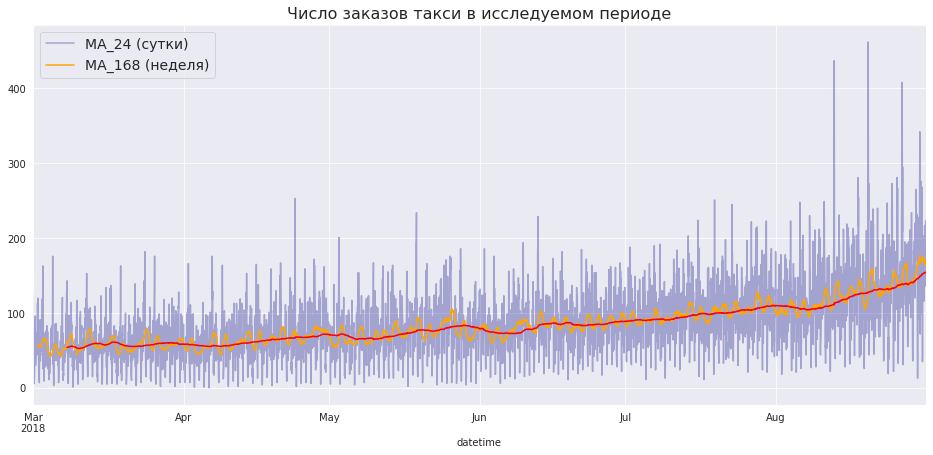

In [11]:

plt.figure(figsize=(16, 7))
df['num_orders'].plot(ax=plt.gca(), color='navy', alpha=0.3);
df['num_orders'].shift(1).rolling(24).mean().plot(ax=plt.gca(), color='orange');
df['num_orders'].shift(1).rolling(168).mean().plot(ax=plt.gca(), color='red')
plt.title('Число заказов такси в исследуемом периоде', fontsize=16)
plt.legend(['MA_24 (сутки)', 'MA_168 (неделя)'], fontsize=14);

На графике хорошо **заметен тренд**, число заказов постепенно растет, сервис пользуется все большей популярностью. Дополнительно смотрим циклы в течение дня и недели, для оценки берем среднее значение.

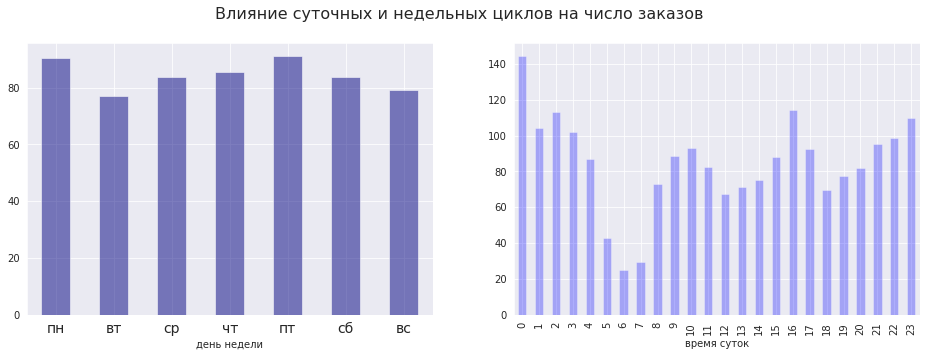

In [12]:
plt.figure(figsize=(16, 5))

plt.suptitle('Влияние суточных и недельных циклов на число заказов', fontsize=16)
plt.subplot(121)
df.groupby(by=['dayofweek'])['num_orders'].mean().plot(color='navy', kind='bar', alpha=0.5)
plt.xticks(range(7), ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'],  rotation=0, fontsize=14)
plt.xlabel('день недели')
plt.grid(True)

plt.subplot(122)
df.groupby(by=['hour'])['num_orders'].mean().plot(color='blue', kind='bar', alpha=0.3);
plt.xlabel('время суток')
plt.grid(True)

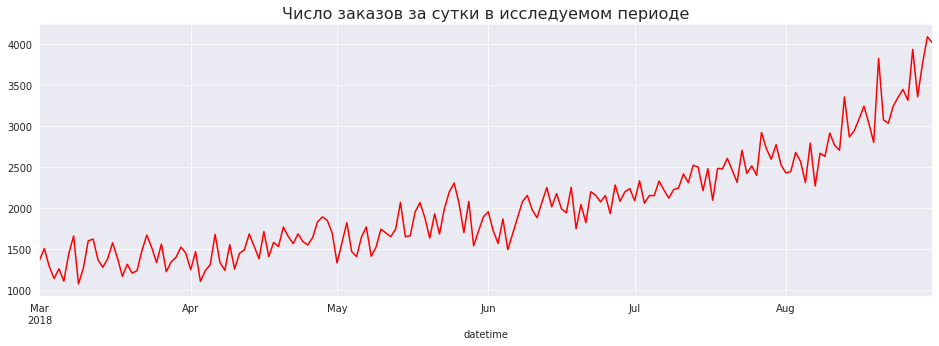

In [13]:
plt.figure(figsize=(16, 5))
df['num_orders'].resample('1D').sum().plot(color='red')
plt.title('Число заказов за сутки в исследуемом периоде', fontsize=16);

**Выводы:**\
В данных есть растущий тренд. Заметно влияние на число заказов суточного и недельного циклов. Наиболее загружены понедельник и пятница, наименее вторник. По суточному циклу наибольший спад ранним утром: с 5 до 7 часов.

#### Смещение данных / лаг

Чтобы искючить угадывание параметров, решено перед добавлением признаков проанализировать степень их влияния на результат модели. Для решения задачи выбрана самая простая и быстрая модель - линейная регрессия. Созданные признаки передаются модели по дному и отдельно от всех остальных, затем лучшие по метрике RMSE будут добавлены в итоговые признаки.\
**Чтобы исключить утечку целевого признака подбор выполняется на части выборки, которая будет затем использована в качестве тренировочной.**

In [14]:
# создание подвыборки для подбора
lag_train, lag_test = train_test_split(df['num_orders'], shuffle=False, test_size=0.1)
df_lag_train = pd.DataFrame(lag_train)

In [15]:
# оптимум будем искать несколько раз
# поэтому код обучения модели выделен в отдельную функцию
def train_model(data, model, target_column):
    data.dropna(inplace=True)    
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    # разделение выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)        
    model.fit(X_train, y_train)
    return model, X_train, X_test, y_train, y_test

In [16]:
def lag_optimum_soliter(df, max_lag, target_column ='num_orders'):     
    result=[]
    model = LinearRegression()
    
    for lag in range(1, max_lag + 1):
        data = pd.DataFrame(df[target_column].copy())
        data['lag_{}'.format(lag)] = data[target_column].shift(lag)
        model, X_train, X_test, y_train, y_test = train_model(data, model, target_column)
        result.append([lag, rmse(y_train, model.predict(X_train)), rmse(y_test, model.predict(X_test))])

    df_result = pd.DataFrame(result, columns=['lag', 'RMSE_train', 'RMSE_test'])    
    return df_result

df_lag_single = lag_optimum_soliter(df_lag_train, 100) 
df_lag_single.sort_values(by='RMSE_test', ascending=True).head(10)

,lag,RMSE_train,RMSE_test
47,48,26.49,37.23
71,72,27.37,37.66
95,96,27.40,38.15
23,24,27.75,39.97
0,1,30.39,43.98
48,49,31.70,45.13
46,47,31.76,45.31
70,71,32.21,46.74
24,25,32.37,46.75
94,95,32.28,46.79


**Наибольшее влияние оказывают лаги кратные суткам 24, 48, 72, 96 и заказы последнего часа - 1.** Поэтому отбираем эти топ-5 для создания признаков, остальные параметры пока не учитываем, чтобы не перегружать модель "мусорными" признаками которые находятся во взаимной корреляции.

In [17]:
# список наиболее весомых лагов для создания признаков
list_lag_best = np.sort(
    df_lag_single.sort_values(by='RMSE_test', ascending=True).head(5)['lag'].values)
list_lag_best 

array([ 1, 24, 48, 72, 96])

In [18]:
# функция для расчета эффективности
# добавления сразу серии лагов от 1 до заданного значения
def lag_optimum(df, max_lag, target_column ='num_orders'):     
    result=[]
    model = LinearRegression()
    data = pd.DataFrame(df[target_column].copy())

    for lag in range(1, max_lag + 1):        
        data['lag_{}'.format(lag)] = data[target_column].shift(lag)
        model, X_train, X_test, y_train, y_test = train_model(data, model, target_column)
        result.append([lag, rmse(y_train, model.predict(X_train)), rmse(y_test, model.predict(X_test))])

    df_result = pd.DataFrame(result, columns=['lag', 'RMSE_train', 'RMSE_test'])    
    return df_result

df_lag = lag_optimum(df_lag_train, 48)    
df_lag.sort_values(by='RMSE_test', ascending=True).head(5)

,lag,RMSE_train,RMSE_test
47,48,24.02,32.38
46,47,25.24,33.76
45,46,25.48,34.33
23,24,25.14,34.34
32,33,25.05,34.36


Прослеживается предыдущая зависимость - **наибольший вклад в качество модели при значениях кратных 24.** При этом вероятно только несколько из добавляемых значений реально вносят вклад в эффективность модели, остальные могут даже мешать и ухудшают скорость работы модели. Эксперименты это потом потдтвердили, поэтому **от добавления признаков скопом решено отказаться.** 

#### Скользящее среднее - MA

Аналогичный подход применен при поиске эффектвных параметров скользящего среднего.

In [19]:
def train_model(data, model, target_column):
    data.dropna(inplace=True)    
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    # разделение выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)        
    model.fit(X_train, y_train)
    return model, X_train, X_test, y_train, y_test

In [20]:
# диапазон начинается с 2, иначе это аналог shift
def MA_optimum(df, max_ma, target_column ='num_orders'):     
    result=[]
    model = LinearRegression()
    
    for step in range(2, max_ma + 1):
        data = pd.DataFrame(df[target_column].copy())
        data['MA_{}'.format(step)] = df[target_column].shift(1).rolling(step).mean()
        model, X_train, X_test, y_train, y_test = train_model(data, model, target_column)
        result.append([step, rmse(y_train, model.predict(X_train)), rmse(y_test, model.predict(X_test))])

    df_result = pd.DataFrame(result, columns=['ma_step', 'RMSE_train', 'RMSE_test'])    
    return df_result

df_MA = MA_optimum(df_lag_train, 200) 
df_MA.sort_values(by='RMSE_test', ascending=True).head(10)

,ma_step,RMSE_train,RMSE_test
0,2,30.90,45.18
72,74,32.72,45.34
73,75,32.73,45.39
74,76,32.80,45.48
71,73,32.75,45.51
75,77,32.86,45.58
48,50,32.64,45.58
96,98,32.85,45.64
49,51,32.64,45.66
76,78,32.93,45.68


Основная цель добавления MA - отслеживать возможные циклы. **Чтобы исключить близкие значения, из топ-10 вручную отобраны 4 наиболее удаленных друг от друга.**

In [21]:
list_ma_best = [2, 50, 74, 98]

#### Создание дополнительных признаков смещения и MA

In [22]:
#############################################################
# функциии для добавления в датасет новых расчетных признаков
#############################################################

# создание признаков - серии лагов от 1 до заданного значения max_lag
def make_lag(data, max_lag):     
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    
# создание признаков - серии лагов по заданному списку lag_list
def make_lag_from_list(data, lag_list):     
    for lag in lag_list:
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

# создание признаков - скользящих средних по заданному списку ma_list
def make_ma_from_list(data, ma_list):     
    for step in ma_list:
        data['MA_{}'.format(step)] = data['num_orders'].shift(1).rolling(step).mean()

In [23]:
print('Отобранные признаки для смещения (shift):', list_lag_best)
print('Отобранные признаки для скользящего среднего (МА):', list_ma_best)

Отобранные признаки для смещения (shift): [ 1 24 48 72 96]
Отобранные признаки для скользящего среднего (МА): [2, 50, 74, 98]


In [24]:
# создаем признаки lag_
make_lag_from_list(df, list_lag_best)

In [25]:
# создаем признаки ma_
make_ma_from_list(df, list_ma_best)

In [26]:
# оцениваем результат добавления новых признаков
df.dropna().head(3)

,num_orders,dayofyear,dayofweek,hour,lag_1,lag_24,lag_48,lag_72,lag_96,MA_2,MA_50,MA_74,MA_98
datetime,,,,,,,,,,,,,
2018-03-05 02:00:00,32,64,0,2,176.0,26.0,25.0,75.0,71.0,131.0,53.86,56.74,56.77
2018-03-05 03:00:00,51,64,0,3,32.0,42.0,64.0,64.0,66.0,104.0,51.24,55.96,55.83
2018-03-05 04:00:00,34,64,0,4,51.0,27.0,44.0,20.0,43.0,41.5,50.10,55.03,55.48


## Обучение

In [27]:
# подгoтовка признаков
# удаляем пропуски появившиеся после создания скользящих средних
df.dropna(inplace=True)
X = df.drop('num_orders', axis=1)
y = df['num_orders']
# разделение выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [28]:
print('размер выборки Train:', y_train.shape[0])
print('размер выборки Test:', y_test.shape[0])

размер выборки Train: 3886
размер выборки Test: 432


### Модель базовая Dummy-mean

In [29]:
dummy_predict = pd.Series(np.ones(len(y_test)))
dummy_predict[:] = y_train.mean()
print('оценка RMSE для test: {:.2f}'.format(rmse(y_test, dummy_predict)))

оценка RMSE для test: 84.82


### Модель LinearRegression

In [30]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
print('оценка RMSE для train: {:.2f}'.format(rmse(y_train, model_LR.predict(X_train))))
print('оценка RMSE для test: {:.2f}'.format(rmse(y_test, model_LR.predict(X_test))))

оценка RMSE для train: 23.23
оценка RMSE для test: 43.75


### Модель ElasticNet

In [31]:
model_Elast =  ElasticNet(random_state=210610)
# вариация параметра l1_ratio позволяет испытать разные модели штрафов: 
# 0 - Grid, 1 - Lasso, и все промежуточные значения это Elastic
params = {  'alpha': [1], 
            'l1_ratio': [0.01, 0.5, 0.7, 0.9, 0.99]                
    } 
gsc_Elast = GridSearchCV(model_Elast, 
                   param_grid=params, 
                   scoring=rmse_score, 
                   cv=TimeSeriesSplit(n_splits=3).split(X_train))

gsc_Elast = gsc_Elast.fit(X_train, y_train)
print('лучшие параметры:', gsc_Elast.best_params_)
print('лучшая оценка RMSE на train: {:.2f}'.format(-gsc_Elast.best_score_ ))
print('оценка RMSE для test: {:.2f}'.format(rmse(y_test, gsc_Elast.predict(X_test))))

лучшие параметры: {'alpha': 1, 'l1_ratio': 0.01}
лучшая оценка RMSE на train: 24.90
оценка RMSE для test: 43.28


### Модель LightGBM

In [32]:
%%time
X_train_lgb, X_valid_lgb, y_train_lgb, y_valid_lgb = train_test_split(X_train, y_train, 
                                                                      test_size=0.1, shuffle=False)
lgb_train = lgb.Dataset(X_train_lgb, y_train_lgb )
lgb_eval = lgb.Dataset(X_valid_lgb, y_valid_lgb, reference=lgb_train)

# словарь с параметрами
params = {
    'num_iterations': 300,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'root_mean_squared_error'},
    'num_leaves': 168,
    'min_data_in_leaf': 5,
    'max_bin': 1000,
    'learning_rate': 0.02,
    #'device_type': 'gpu',
    'verbose': 1
}

print('Старт обучения...')

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=15
                )

print('Модель LightGBM')
print('RMSE предсказания:', rmse(y_test, gbm.predict(X_test, num_iteration=gbm.best_iteration)))

Старт обучения...
[1]	valid_0's rmse: 57.1235
Training until validation scores don't improve for 15 rounds
[2]	valid_0's rmse: 56.4926
[3]	valid_0's rmse: 55.8957
[4]	valid_0's rmse: 55.3045
[5]	valid_0's rmse: 54.7258
[6]	valid_0's rmse: 54.1792
[7]	valid_0's rmse: 53.633
[8]	valid_0's rmse: 53.0775
[9]	valid_0's rmse: 52.5753
[10]	valid_0's rmse: 52.0514
[11]	valid_0's rmse: 51.4608
[12]	valid_0's rmse: 50.9595
[13]	valid_0's rmse: 50.4398
[14]	valid_0's rmse: 49.9501
[15]	valid_0's rmse: 49.355
[16]	valid_0's rmse: 48.8165
[17]	valid_0's rmse: 48.2426
[18]	valid_0's rmse: 47.7238
[19]	valid_0's rmse: 47.1976
[20]	valid_0's rmse: 46.7916
[21]	valid_0's rmse: 46.4148
[22]	valid_0's rmse: 46.0333
[23]	valid_0's rmse: 45.554
[24]	valid_0's rmse: 45.0659
[25]	valid_0's rmse: 44.7137
[26]	valid_0's rmse: 44.2784
[27]	valid_0's rmse: 43.8295
[28]	valid_0's rmse: 43.4414
[29]	valid_0's rmse: 43.1391
[30]	valid_0's rmse: 42.7305
[31]	valid_0's rmse: 42.4459
[32]	valid_0's rmse: 42.0758
[33]	

**С моделью Lightgbm удачные параметры подобрать не удалось.**

### Модель Хольта-Винтерса

Модель тройного экпоненциального сглаживания Хольта-Винтерса и код честно скопированы и адаптированы из: https://habr.com/ru/company/ods/blog/327242/

В п.3.5.1 практически нет доработок и выполнен прогноз на 24 часа вперед, в 3.5.2 сделана адаптация под задачу проекта - прогноз на 1 час во всем диапазоне тестовой выборки (для корректного сравнения эффективности с другими моделями)

#### Прогноз на 24 часа

In [33]:
class HoltWinters:

    """
    Модель Хольта-Винтерса с методом Брутлага для детектирования аномалий
    https://fedcsis.org/proceedings/2012/pliks/118.pdf

    # series - исходный временной ряд
    # slen - длина сезона
    # alpha, beta, gamma - коэффициенты модели Хольта-Винтерса
    # n_preds - горизонт предсказаний
    # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=2):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # вычисляем сезонные средние
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # вычисляем начальные значения
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series)+self.n_preds):
            if i == 0: # инициализируем значения компонент
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                continue
            if i >= len(self.series): # прогнозируем
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])

                # во время прогноза с каждым шагом увеличиваем неопределенность
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 

            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])

                # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])

            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])

In [34]:
def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = data.values
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 24*7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

    # Возвращаем средний квадрат ошибки по вектору ошибок 
    return np.mean(np.array(errors))

**Обучение модели Хольта-Винтерса**

In [35]:
%%time
##################################
# обучение модели на выборке train
##################################
data = y_train
# data = df.num_orders

# инициализируем значения параметров
x = [0, 0, 0] 

# Минимизируем функцию потерь с ограничениями на параметры
# начальные диапазоны поиска должны быть [0, 1], в коде сжаты вокруг оптимума 
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 0.1), (0, 0.1), (0.2, 0.4)))

# Из оптимизатора берем оптимальное значение параметров
alpha_final, beta_final, gamma_final = opt.x
print('alfa: {:.4f}  betta: {:.4f}  gamma:{:.4f}'.format(alpha_final, beta_final, gamma_final))

alfa: 0.0003  betta: 0.0014  gamma:0.2689
CPU times: user 45.5 s, sys: 0 ns, total: 45.5 s
Wall time: 46.2 s


In [36]:
print('размер общей выборки:', df.shape[0])
print('размер выборки train:', y_train.shape[0])
print('размер выборки test:', y_test.shape[0])

размер общей выборки: 4318
размер выборки train: 3886
размер выборки test: 432


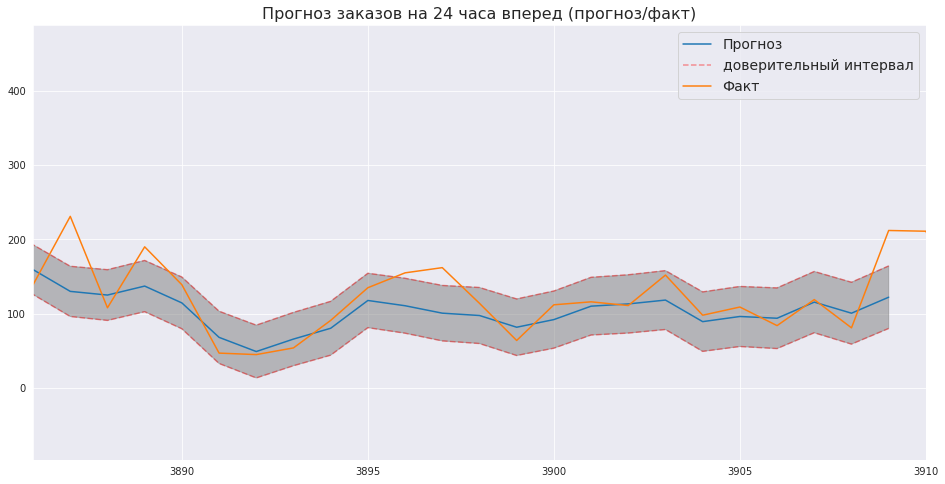

In [37]:
#######################################################
# дальность предсказаний в выбранных интервалах (часах)
n_preds = 24
#######################################################
data = df.num_orders
model = HoltWinters(
                    data[:-y_test.shape[0]], 
                    slen = 24*7, alpha = alpha_final, beta = beta_final, 
                    gamma = gamma_final, n_preds = n_preds, scaling_factor = 2.56)
model.triple_exponential_smoothing()

def plotHoltWinters():
    #Anomalies = np.array([np.NaN]*len(data))
    #Anomalies[data.values<model.LowerBond] = data.values[data.values<model.LowerBond]
    plt.figure(figsize=(16, 8))
    plt.title('Прогноз заказов на 24 часа вперед (прогноз/факт)', fontsize=16)
    plt.plot(model.result, label = "Прогноз")
    plt.plot(model.UpperBond, "r--", alpha=0.4, label = "доверительный интервал")
    plt.plot(model.LowerBond, "r--", alpha=0.4)
    plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, y2=model.LowerBond, alpha=0.5, color = "grey")
    plt.plot(data.values, label = "Факт")
    #plt.plot(Anomalies, "o", markersize=10, label = "Anomalies")
    #plt.axvspan(len(data)-1, len(data), alpha=0.5, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=14)
    plt.xlim((df.shape[0] - y_test.shape[0]), 
             len(model.result));

plotHoltWinters()

**Модель дает качественные долгосрочные предсказания.**

#### Прогноз на 1 час. Адаптация под проектный датасет

Сдесь сделана адаптация модели под проект. Посокльку по заданию предсказание нужно сделать на ближайший час, модель строится по доступным данным, делается предсказание на ближайший час, после чего диапазон доступных данных спмещается на час вперед и т.д.
Размер выборки для расчета сделан одинаковым с тестовым для остальных моделей.
При этом тест проводится в более жестких условиях чем для других моделей, посокольку не используются никакие дополнительные признаки содержащие по сути утечку информации от текущем состоянии цикла.

In [38]:
print('размер общей выборки:', df.shape[0])
print('размер выборки train:', y_train.shape[0])
print('размер выборки test:', y_test.shape[0])

размер общей выборки: 4318
размер выборки train: 3886
размер выборки test: 432


In [39]:
##########################################
# код для отладки работы цикла
##########################################
# def HoltWinters_predict(df, test_size):
#     data = df
#     HoltWinters_result=[]
#     print('--------старт--------')
#     print('всего предсказаний', test_size - 1)
#     print('---------------------')
#     #print('     - осталось', end=" " )
#     for i in range(test_size, 1, -1):
#         model = HoltWinters(data[:-i], slen = 24*7, 
#                 alpha = alpha_final, beta = beta_final, gamma = gamma_final, 
#                 n_preds = 1, scaling_factor = 2.56)
#         model.triple_exponential_smoothing()
#         HoltWinters_result.append([data.index[-i], i, model.result[-1], data[-i], 
#                                    rmse(data.iloc[:(-i+1)], model.result)])
        
#         print('\rосталось      - {:6.0f}'.format(i - 1), end='', flush=True) 
#     df_HoltWinters_result=pd.DataFrame(HoltWinters_result, 
#                                        columns=['datetime', 'iter', 'predict', 'test', 'rmse_train'])
#     df_HoltWinters_result.set_index('datetime') 
#     return df_HoltWinters_result

# TEST_SIZE = 15
# #TEST_SIZE = y_test.shape[0]

# df_for_model = df['num_orders']
# df_HoltWinters_predict = HoltWinters_predict(df_for_model, TEST_SIZE)
# print(rmse(df_HoltWinters_predict['test'] , df_HoltWinters_predict['predict']))
# df_HoltWinters_predict.set_index('datetime', inplace=True)

# plt.figure(figsize=(16, 8))
# df_HoltWinters_predict.plot(ax=plt.gca());

In [40]:
def HoltWinters_predict(df, test_size, n_preds=1):
    data = df
    HoltWinters_result=[]
    print('--------старт--------')
    print('всего предсказаний', test_size - 1)
    print('---------------------')
    #print('     - осталось', end=" " )
    for i in range(test_size, 1, -1):
        model = HoltWinters(data[:-i], slen = 24*7, 
                alpha = alpha_final, beta = beta_final, gamma = gamma_final, 
                n_preds = n_preds, scaling_factor = 2.56)
        model.triple_exponential_smoothing()
        HoltWinters_result.append([data.index[-i], i, model.result[-1], data[-i], 
                                   rmse(data.iloc[:(-i+1)], model.result)])
        
        print('\rосталось      - {:6.0f}'.format(i - 1), end='', flush=True) 
    df_HoltWinters_result=pd.DataFrame(HoltWinters_result, 
                                       columns=['datetime', 'iter', 'predict', 'test', 'rmse_train'])
    df_HoltWinters_result.set_index('datetime') 
    return df_HoltWinters_result

**ВНИМАНИЕ!**

Следующая ячейка может выполняться несколько минут (для удобства добавлен счетчик итераций). По умолчанию расчет выполняется на размер тестовой выборки для корректного сравнения с результатами остальных моделей. Для сокращения времени работы можно  уменьшить константу  **TEST_SIZE**, но собъется расчет итогов в конце проекта.

In [41]:
# TEST_SIZE = 15
TEST_SIZE = y_test.shape[0]

df_for_model = df.num_orders
df_HoltWinters_predict = HoltWinters_predict(df_for_model, TEST_SIZE)
df_HoltWinters_predict.set_index('datetime', inplace=True)
print('\n')
print('RMSE на тестовой выборке:', rmse(df_HoltWinters_predict['test'] , df_HoltWinters_predict['predict']))

--------старт--------
всего предсказаний 431
---------------------
осталось      -      1

RMSE на тестовой выборке: 38.719681339542234


In [42]:
print('\n')
print('RMSE на тестовой выборке:', rmse(df_HoltWinters_predict['test'] , df_HoltWinters_predict['predict']))



RMSE на тестовой выборке: 38.719681339542234


## Тестирование

In [43]:
# создаем датафрейм с предсказаниями моделей
df_result = pd.DataFrame(y_test.copy())
df_result['Mean'] = y_train.mean() # среднее по тренировочной выборке
df_result['LR'] = model_LR.predict(X_test)
df_result['Elastic'] = gsc_Elast.predict(X_test)
df_result['LGB'] = gbm.predict(X_test, num_iteration=gbm.best_iteration)
df_result = df_result.join(df_HoltWinters_predict['predict'], how='left')
df_result.rename(columns={'predict' : 'HW', 'num_orders' : 'Y_test'}, inplace=True)
df_result.dropna(inplace=True)
df_result.head(3)

,Y_test,Mean,LR,Elastic,LGB,HW
datetime,,,,,,
2018-08-14 00:00:00,139,78.95,184.52,183.77,161.99,159.33
2018-08-14 01:00:00,231,78.95,172.16,173.58,133.67,130.05
2018-08-14 02:00:00,108,78.95,211.46,212.18,136.88,125.14


In [44]:
# расчет таблицы с метриками по моделям
model_result = []
model_columns = ['HW', 'LR', 'Elastic', 'LGB', 'Mean']
for model in model_columns:
    model_result.append([model, rmse(df_result['Y_test'], df_result[model]), 
          mean_absolute_error(df_result['Y_test'], df_result[model])])
df_model_result = pd.DataFrame(model_result, columns=['model', 'RMSE', 'MAE'])    
df_model_result.set_index('model', inplace=True)

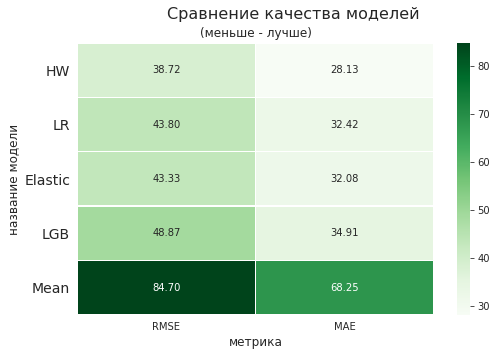

In [45]:
plt.figure(figsize=(8, 5))
scaled_df = (df_model_result - df_model_result.min(axis=0))/(df_model_result.max(axis=0) - df_model_result.min(axis=0))
sns.heatmap(df_model_result, annot=df_model_result, fmt='.2f', linewidths=.5, cmap="Greens")
plt.suptitle('Cравнение качества моделей', fontsize=16)
plt.yticks(rotation=0, fontsize=14)
plt.ylabel('название модели', fontsize=12)
plt.xlabel('метрика', fontsize=12)
plt.title('(меньше - лучше)', fontsize=12);

Для наглядного сравнения результатов решено построить график с суммированием заказов по дням, это даст представление о точности модели во всем тестовом диапазоне. **Если предсказания близки к тесту и их суммы за сутки также будут близки**. Для контроля ниже будет и график с результатами для одного случайного дня.

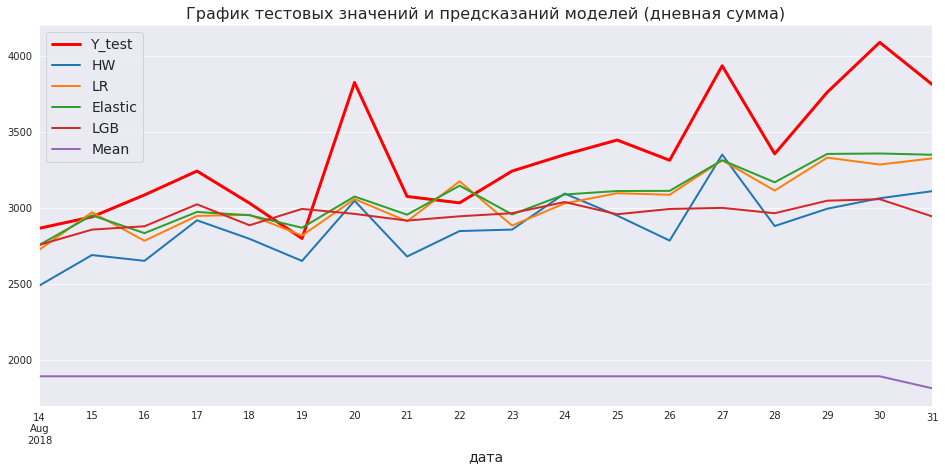

In [46]:
plt.figure(figsize=(16, 7))

df_result['Y_test'].resample('1D').sum().plot(ax=plt.gca(), linewidth=3, color='red')
df_result[model_columns].resample('1D').sum().plot(ax=plt.gca(), linewidth=2)
plt.legend(loc="best", fontsize=14)
plt.title('График тестовых значений и предсказаний моделей (дневная сумма)', fontsize=16)
plt.xlabel('дата', fontsize=14);

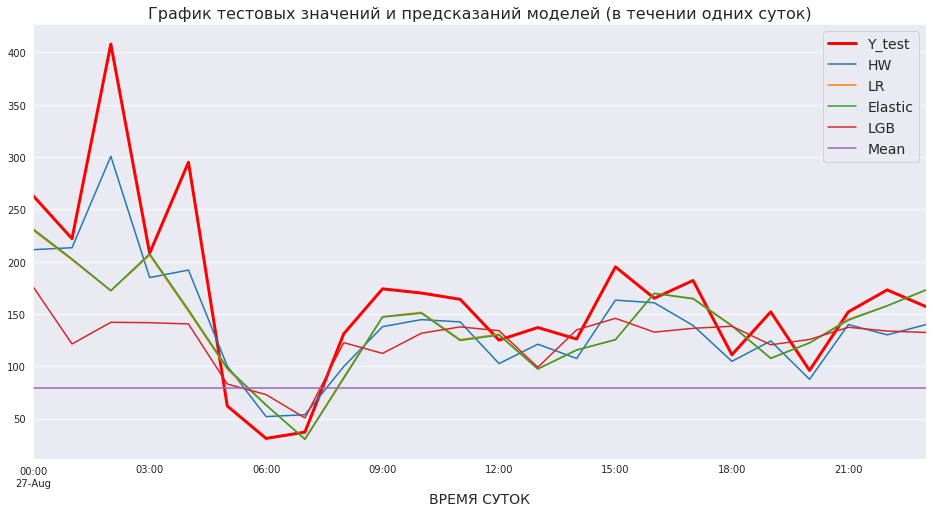

In [47]:
plt.figure(figsize=(16, 8))
df_day = df_result['2018-08-27':'2018-08-27']
df_day['Y_test'].plot(ax=plt.gca(), linewidth=3, color='red')
df_day[model_columns].plot(ax=plt.gca())
plt.legend(loc="best", fontsize=14);
plt.title('График тестовых значений и предсказаний моделей (в течении одних суток)', fontsize=16)
plt.xlabel('ВРЕМЯ СУТОК', fontsize=14);

In [50]:
# for model in model_columns:
#     df_result['overs_{}'.format(model)] = np.abs(df_result[model] - df_result['Y-test'])

### ВЫВОДЫ
**Целевая метрика RMSE в проекте должна быть менее - 48.**

- **лучшее предсказание дает модель Хольта-Винтерса - 38.5**, при этом модель позволяет делать и долгосрочные прогнозы, что является ее большим преимуществом.
- целевой отбор параметров  через предварительное моделирование позволил создать модели **LinearRegression и  ElasticNet с качеством - 43.8**, что существенно превосходящим заданное. Их применение также может быть оправдано при кртакосрочных прогнозах.

Стоит отметить, в тестовом периоде в датасете происходит существенный рост тренда заказов. Если модель Хольта-Винтерса поставить в схожие условия с другими моделями и переобучить на новых данных, это дает показатель **RMSE - 32.**
